In [1]:
import graphlab

A newer version of GraphLab Create (v2.1) is available! Your current version is v1.10.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [2]:
sales = graphlab.SFrame('kc_house_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to kameyabc@gmail.com and will expire on July 02, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: C:\Users\Amey\AppData\Local\Temp\graphlab_server_1471028527.log.0


In [21]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            tmp_cubed = feature.apply(lambda x: x**power)
            poly_sframe[name] = tmp_cubed
    return poly_sframe

In [22]:
sales = sales.sort(['sqft_living', 'price'])

In [23]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [24]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.006002     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

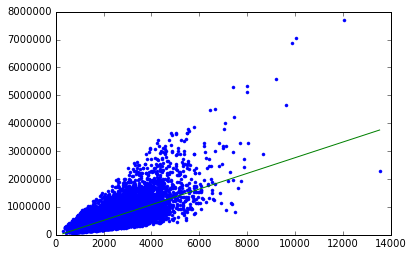

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], model1.predict(poly1_data),'-')

In [26]:
train_validation,test = sales.random_split(.9,seed=1)

In [27]:
train,validation = train_validation.random_split(.5,seed=1)

In [28]:
train

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
1222029077,2014-10-29 00:00:00+00:00,265000.0,0.0,0.75,384.0,213444,1,0
9266700190,2015-05-11 00:00:00+00:00,245000.0,1.0,1.0,390.0,2000,1,0
1352300580,2014-11-14 00:00:00+00:00,247000.0,1.0,1.0,460.0,4120,1,0
8655900162,2015-02-19 00:00:00+00:00,156000.0,1.0,0.75,470.0,15000,1,0
1320069249,2014-10-20 00:00:00+00:00,192500.0,1.0,1.0,470.0,63737,1,0
7849202585,2014-09-04 00:00:00+00:00,170000.0,1.0,1.0,480.0,4560,1,0
0859000110,2014-10-02 00:00:00+00:00,125000.0,1.0,1.0,500.0,7440,1,0
1773101530,2014-12-18 00:00:00+00:00,275000.0,1.0,1.0,520.0,4800,1,0
7588700177,2015-04-20 00:00:00+00:00,310000.0,1.0,0.75,520.0,2885,1,0
4391600065,2014-08-14 00:00:00+00:00,330000.0,2.0,0.75,520.0,6862,1,0


In [29]:
validation

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3980300371,2014-09-26 00:00:00+00:00,142000.0,0.0,0.0,290.0,20875,1,0
2856101479,2014-07-01 00:00:00+00:00,276000.0,1.0,0.75,370.0,1801,1,0
1723049033,2014-06-20 00:00:00+00:00,245000.0,1.0,0.75,380.0,15000,1,0
6896300380,2014-10-02 00:00:00+00:00,228000.0,0.0,1.0,390.0,5900,1,0
6303400395,2015-01-30 00:00:00+00:00,325000.0,1.0,0.75,410.0,8636,1,0
4322200105,2015-03-31 00:00:00+00:00,229050.0,1.0,1.0,420.0,3298,1,0
7549801385,2014-06-12 00:00:00+00:00,280000.0,1.0,0.75,420.0,6720,1,0
3523029041,2014-10-09 00:00:00+00:00,290000.0,2.0,0.75,440.0,8313,1,1
1437500015,2014-07-09 00:00:00+00:00,150000.0,3.0,0.75,490.0,38500,1.5,0
2420069251,2015-02-25 00:00:00+00:00,262000.0,1.0,0.75,520.0,12981,1,0


In [35]:
poly_datax = polynomial_sframe(train['sqft_living'], 15)
poly_datax['price'] = train['price'] # add price to the data since it's the target

In [37]:
poly_datax

power_1,power_2,power_3,power_4,power_5,power_6,power_7
384.0,147456.0,56623104.0,21743271936.0,8.34941642342e+12,3.20617590659e+15,1.23117154813e+18
390.0,152100.0,59319000.0,23134410000.0,9.0224199e+12,3.518743761e+15,1.37231006679e+18
460.0,211600.0,97336000.0,44774560000.0,2.05962976e+13,9.474296896e+15,4.35817657216e+18
470.0,220900.0,103823000.0,48796810000.0,2.29345007e+13,1.0779215329e+16,5.06623120463e+18
470.0,220900.0,103823000.0,48796810000.0,2.29345007e+13,1.0779215329e+16,5.06623120463e+18
480.0,230400.0,110592000.0,53084160000.0,2.54803968e+13,1.2230590464e+16,5.87068342272e+18
500.0,250000.0,125000000.0,62500000000.0,3.125e+13,1.5625e+16,7.8125e+18
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16,1.02807170253e+19
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16,1.02807170253e+19
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16,1.02807170253e+19


In [52]:
mmodelx1 = graphlab.linear_regression.create(poly_datax, target = 'price', features = ['power_1'], validation_set = None,verbose=False)

In [53]:
mmodelx15 = graphlab.linear_regression.create(poly_datax, target = 'price', features = ['power_15'], validation_set = None,verbose=False)

In [55]:
mmodelx1.predict(validation)

dtype: float
Rows: 9635
[539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539029.305501486, 539

In [46]:
mmodelx1.coefficients

name,index,value,stderr
(intercept),None,-45052.3457811,6527.16126153
power_1,None,282.175955956,2.8806101547


In [47]:
mmodelx15.coefficients

name,index,value,stderr
(intercept),None,538839.371637,3734.99625696
power_15,None,1.93686029178e-56,3.91497805192e-57


In [50]:
poly_datax

power_1,power_2,power_3,power_4,power_5,power_6,power_7
384.0,147456.0,56623104.0,21743271936.0,8.34941642342e+12,3.20617590659e+15,1.23117154813e+18
390.0,152100.0,59319000.0,23134410000.0,9.0224199e+12,3.518743761e+15,1.37231006679e+18
460.0,211600.0,97336000.0,44774560000.0,2.05962976e+13,9.474296896e+15,4.35817657216e+18
470.0,220900.0,103823000.0,48796810000.0,2.29345007e+13,1.0779215329e+16,5.06623120463e+18
470.0,220900.0,103823000.0,48796810000.0,2.29345007e+13,1.0779215329e+16,5.06623120463e+18
480.0,230400.0,110592000.0,53084160000.0,2.54803968e+13,1.2230590464e+16,5.87068342272e+18
500.0,250000.0,125000000.0,62500000000.0,3.125e+13,1.5625e+16,7.8125e+18
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16,1.02807170253e+19
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16,1.02807170253e+19
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16,1.02807170253e+19


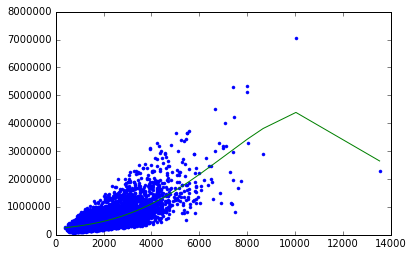

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly_datax['power_1'],poly_datax['price'],'.',
poly_datax['power_1'], mmodelx1.predict(poly_datax),'-')

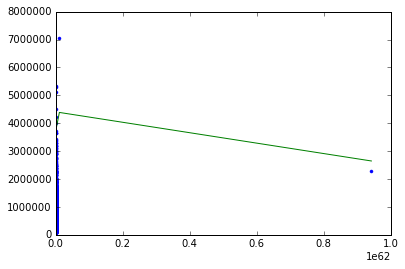

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly_datax['power_15'],poly_datax['price'],'.',
poly_datax['power_15'], mmodelx1.predict(poly_datax),'-')